# Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 

# Load The Dataset

In [5]:
# Loading the raw dataset
data = pd.read_csv('C:\\Users\\Rimi\\Documents\\SpringBoard\\Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Basic info and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Handling Missing Values

In [10]:
data.isnull().sum()  # Check missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Filling missing Item_Weight values
data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

# Filling missing Outlet_Size values
data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [14]:
# Verifying no missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Visualization

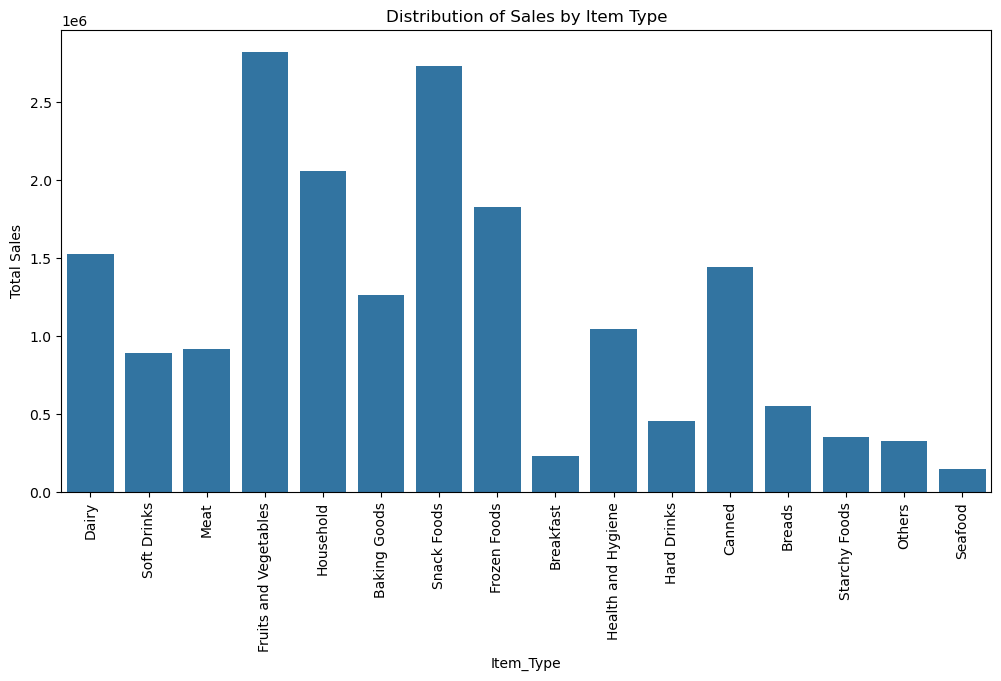

In [22]:
# Bar plot of total sales by Item Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=p_data, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Total Sales')
plt.show()

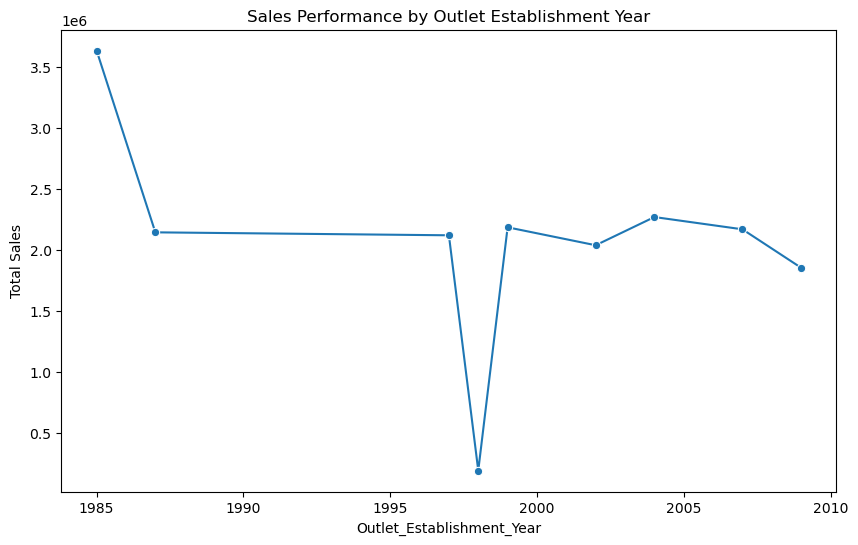

In [26]:
# Line plot for Sales Performance by Outlet Establishment Year
p_data_year_sales = p_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_data_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

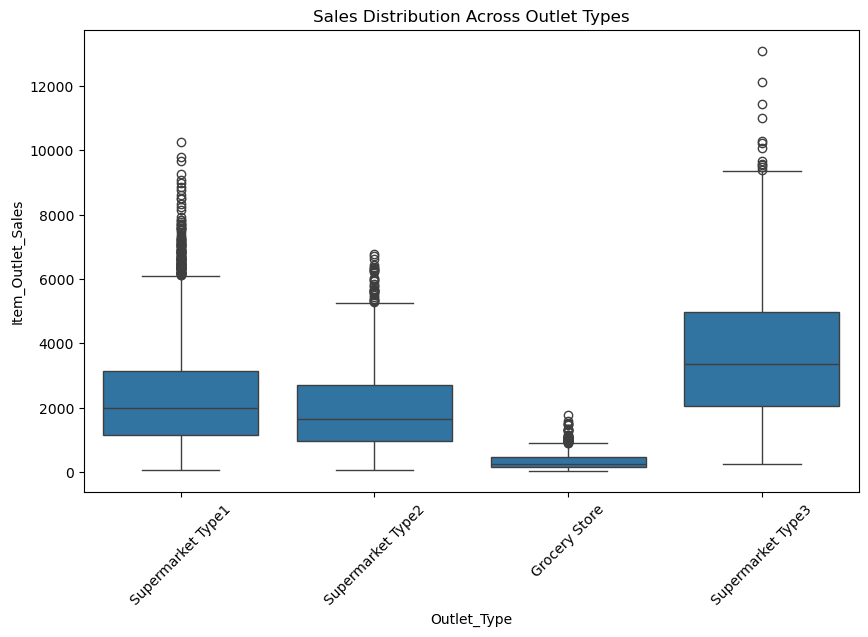

In [28]:
# Box plot of sales across Outlet Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_data)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()

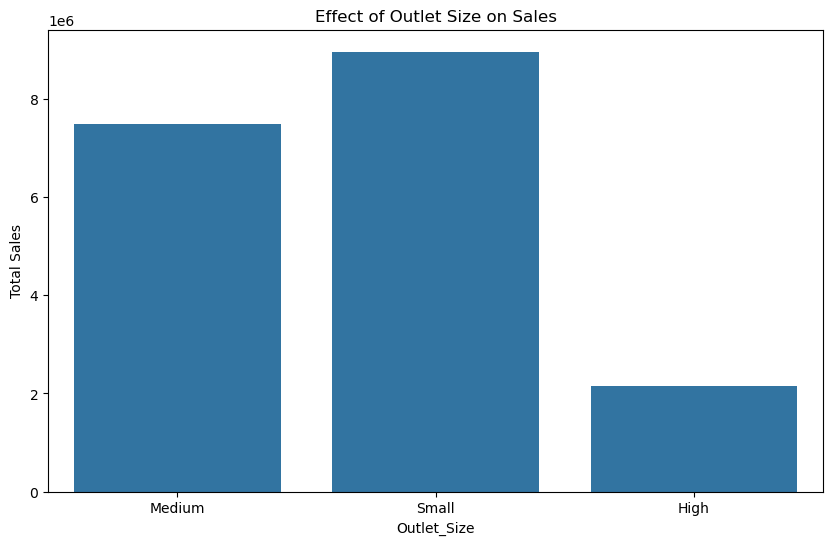

In [36]:
# Bar plot of sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=p_data, estimator=sum, errorbar=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.show()

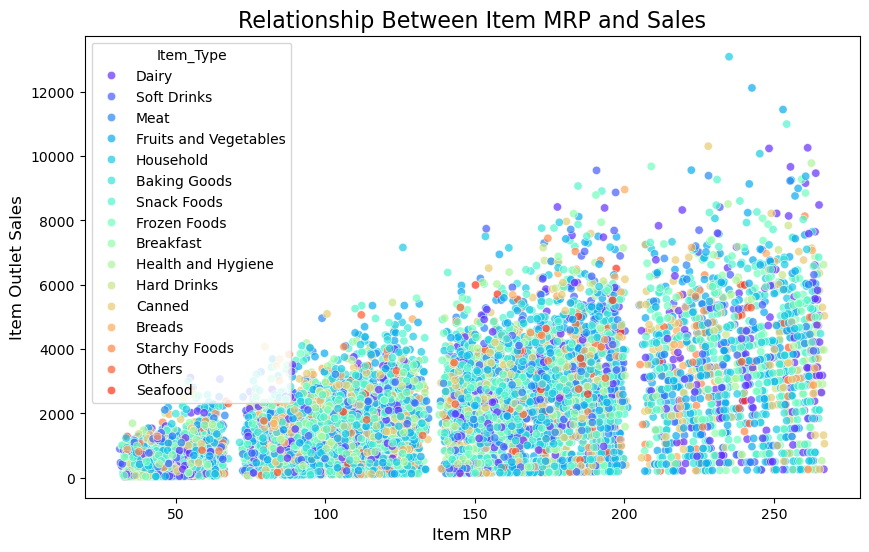

In [38]:
# 5. Relationship Between Item MRP and Sales (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_data, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

# Additional Visualizations

<Figure size 1500x1000 with 0 Axes>

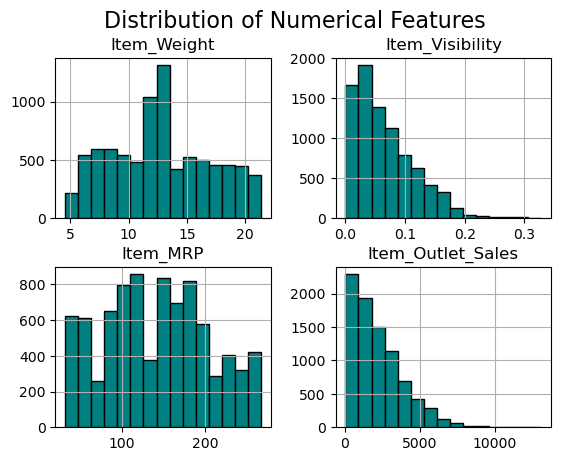

In [41]:
# Define numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# 1. Visualizing the distribution of numerical features
plt.figure(figsize=(15, 10))
data[numerical_columns].hist(bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

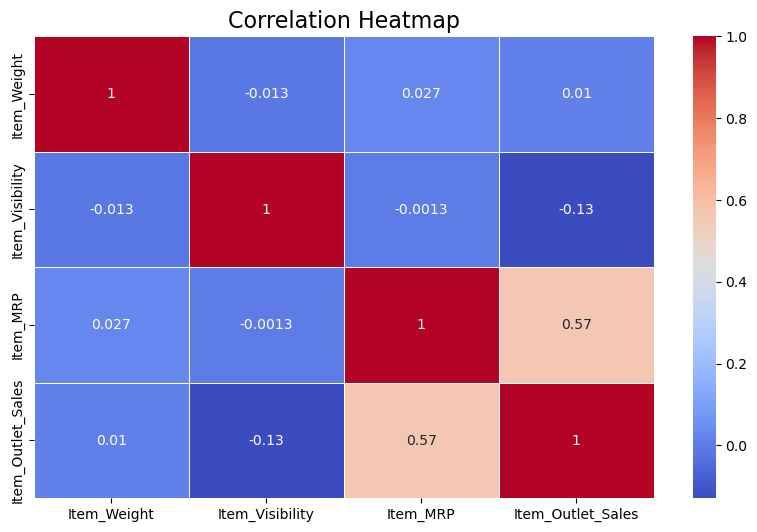

In [43]:
# 2. Checking Correlations between numerical features using a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

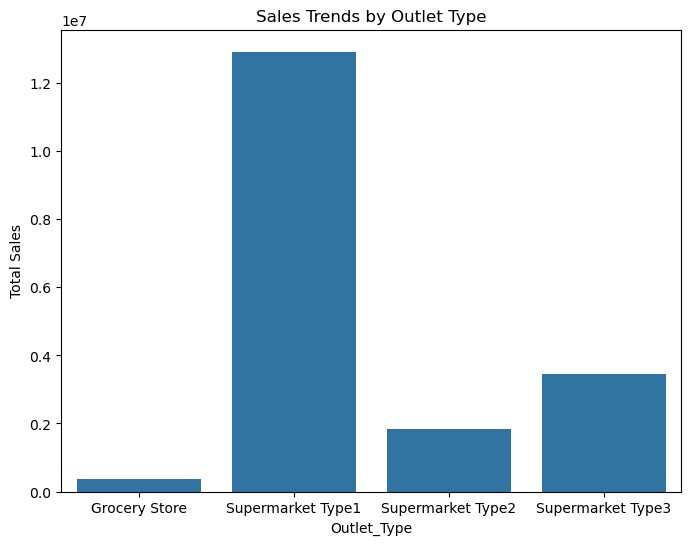

In [45]:
# Group by Outlet_Type and visualize sales trends
p_data_outlet_sales = p_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_data_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.show()

# Univariate Analysis

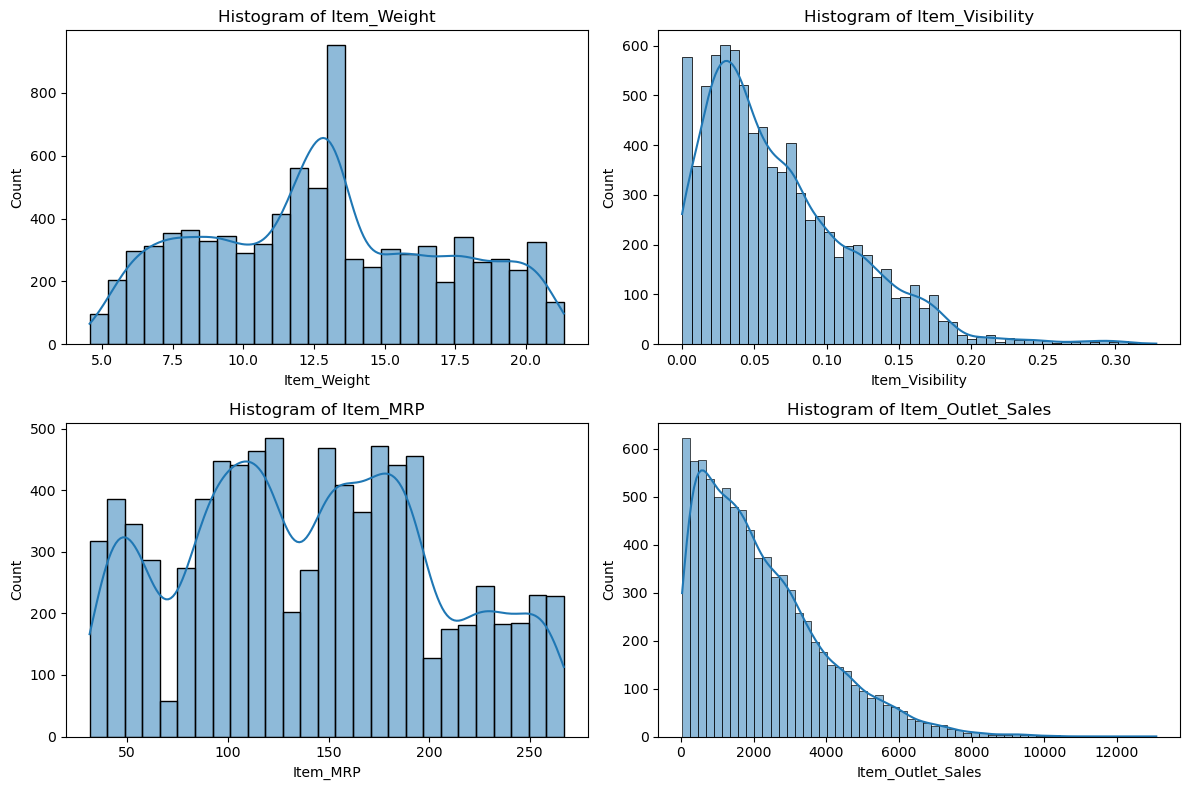

In [48]:
# Numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot histograms
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(p_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Categorical Analysis

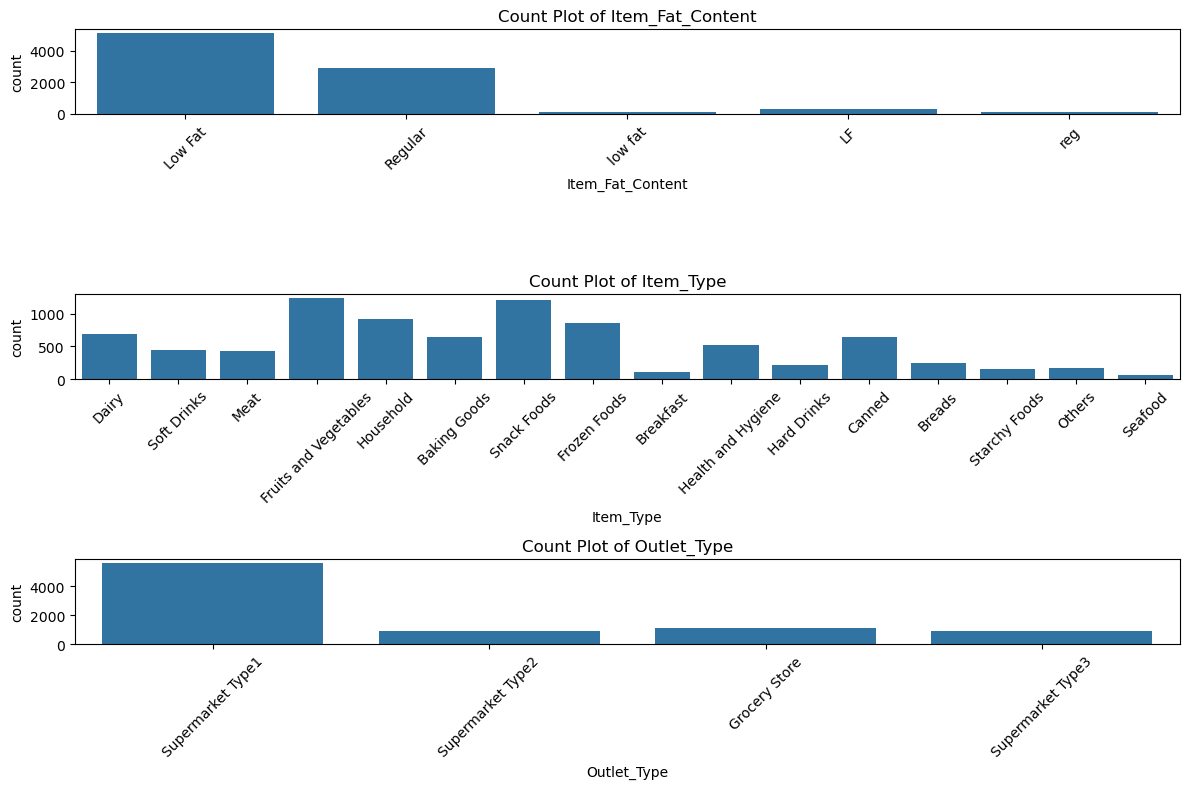

In [51]:
# Categorical features to analyze
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

# Setting up the figure size for better visibility of plots
plt.figure(figsize=(12, 8))  # Increase height for better spacing

# Loop through each categorical feature to create count plots
for idx, feature in enumerate(categorical_features):
    # Creating a subplot for each feature (2 rows, 2 columns)
    plt.subplot(3, 1, idx + 1)  # Changed to 3 rows and 1 column for vertical stacking
    # Generating count plot for the current feature
    sns.countplot(x=p_data[feature])
    plt.title(f'Count Plot of {feature}')  # Title for each plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjusting layout to prevent overlap of plots
plt.tight_layout()  # This ensures that subplots are spaced properly
plt.show()  # Display all the plots


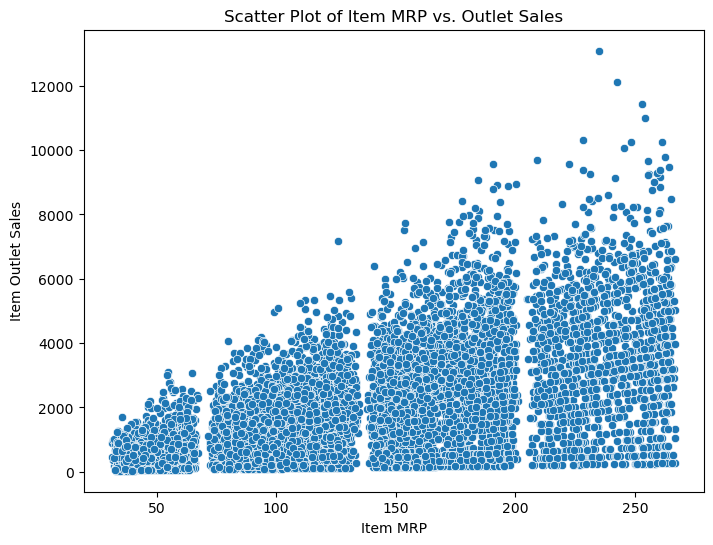

In [53]:
# Scatter plot between Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_data)
plt.title('Scatter Plot of Item MRP vs. Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

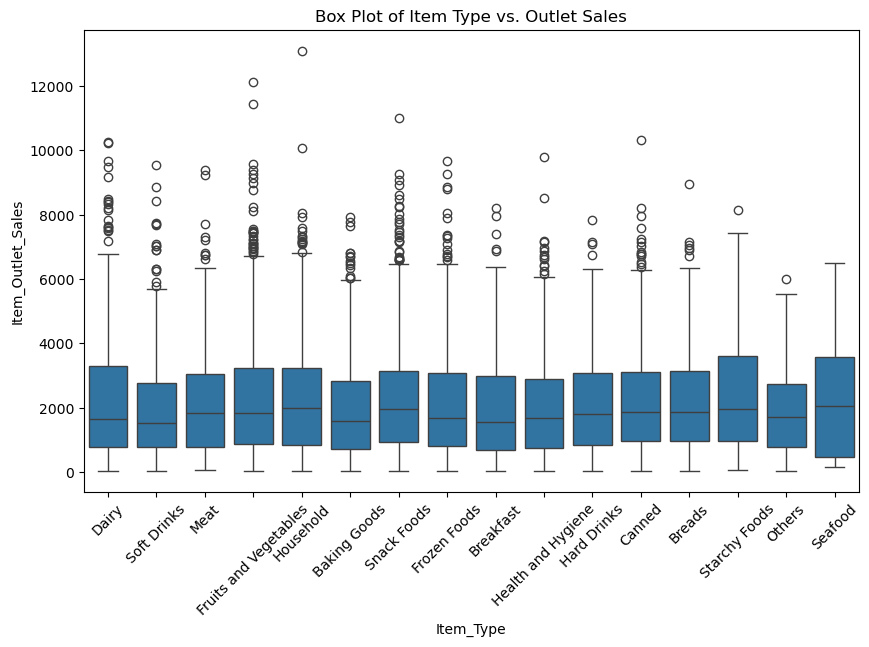

In [55]:
# Box plot for Item Type vs. Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=p_data)
plt.title('Box Plot of Item Type vs. Outlet Sales')
plt.xticks(rotation=45)
plt.show()

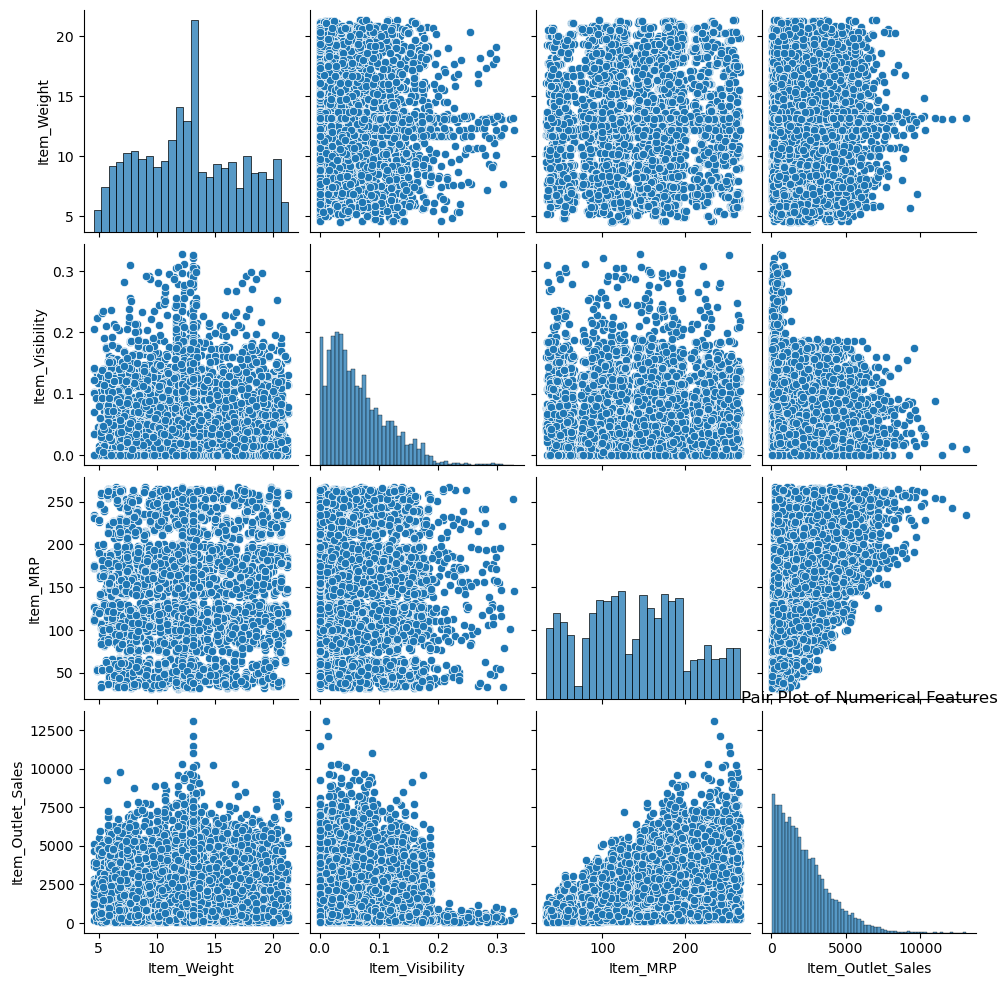

In [57]:
# Pair plot for numerical features
sns.pairplot(p_data[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()